# Coding the course - MLT

With this notebook, I will get started with the coding of my course "Machine learning techniques"

In "Machine Learning Techniques", we learnt the mathematical working of some key algorithms in Machine Learning, ranging from unsupervised to supervised learning algorithms. I will be programming those algorithms in python from scratch.

Towards the end of this coding series, I will create my very own module for ML


# Principal Component Analysis

PCA is a very famous unsupervised learning algorithm used for dimensionality reduction. 

There are 3 approaches to PCA implementation: 
- Variance maximization
- Reconstruction error minimization
- Minimizing covariance

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist


2023-09-05 23:49:55.279048: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
# Dataset generation from keras dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)

In [7]:
X.shape

(100, 784)

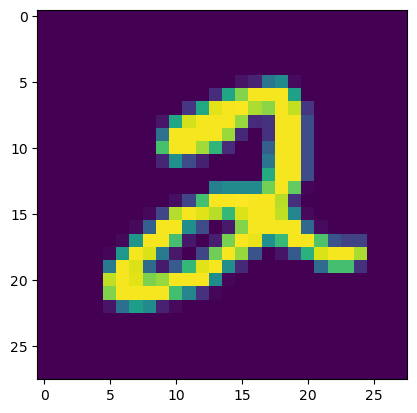

In [8]:
# reshape(-1, d) reshapes the matrix with d number of columns 
# It autofills the value in place of -1 (consider -1 as a wildcard placeholder)

# imshow is a method used to visualize the data point
plt.imshow(X[0].reshape(-1, 28))

In [9]:
# A function to center the dataset

def centering(X):
    X_new = X - X.mean() # Subtracting the mean from every value with axis=0 (default)
    return X_new

In [10]:
# We are working with a smaller dataset, stored in the variable X
X_new = centering(X)

In [11]:
# storing the number of data points and the dimension in the respective variables
n, d = X_new.shape

In [12]:
n, d

(100, 784)

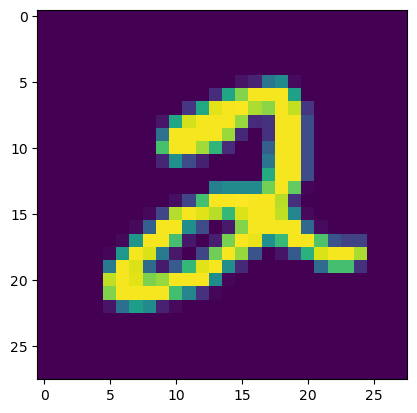

In [13]:
plt.imshow(X_new[0].reshape(-1, 28))

In [14]:
# Can compare the value of X_train[0,:] with the below value
X_new[0].reshape(-1, 28)

array([[-38.41290816, -38.41290816, -38.41290816, -38.41290816,
        -38.41290816, -38.41290816, -38.41290816, -38.41290816,
        -38.41290816, -38.41290816, -38.41290816, -38.41290816,
        -38.41290816, -38.41290816, -38.41290816, -38.41290816,
        -38.41290816, -38.41290816, -38.41290816, -38.41290816,
        -38.41290816, -38.41290816, -38.41290816, -38.41290816,
        -38.41290816, -38.41290816, -38.41290816, -38.41290816],
       [-38.41290816, -38.41290816, -38.41290816, -38.41290816,
        -38.41290816, -38.41290816, -38.41290816, -38.41290816,
        -38.41290816, -38.41290816, -38.41290816, -38.41290816,
        -38.41290816, -38.41290816, -38.41290816, -38.41290816,
        -38.41290816, -38.41290816, -38.41290816, -38.41290816,
        -38.41290816, -38.41290816, -38.41290816, -38.41290816,
        -38.41290816, -38.41290816, -38.41290816, -38.41290816],
       [-38.41290816, -38.41290816, -38.41290816, -38.41290816,
        -38.41290816, -38.41290816, -3

Now, we have to compute the covariance matrix

The covariance matrix is computed using the centered data using the below formula:

$$
\text{If our X has the dimensions } n \times d
\\
\\
C = \dfrac{1}{n}X^TX
$$

In [15]:
# Covariance matrix computation
# .T method is used to take the transpose(similar to .transpose())
# @ symbol is used for matrix multiplication. If we use *, it'll be a value by value multiplication
C = (X_new.T @ X_new)/n

In [16]:
C.shape

(784, 784)

Now, we have our centered dataset in $X_{new}$

We also have our covariance matrix $C$

Now, we need to calculate the principal components from the covariance matrix.

We will do so using the numpy library/module

In [41]:
# Splitting the eigenvalues and the eigenvectors of the covariance matrix
e_vals, e_vectors = np.linalg.eigh(C)


In [42]:
# Printing the max and the min eigenvalue
print(e_vals[0], e_vals[-1], sep="\n")

-8.389069827961787e-10
2313640.6881906735


In [47]:
# Storing 2 eigenvectors of C in the variables
w1, w2 = e_vectors[:,-1], e_vectors[:,-2]

Now, we have the first 2 eigenvectors with us. Similarly, we can get the other eigenvectors as well

In [44]:
# Checking the norm of each eigenvector to confirm norm 1

print(np.linalg.norm(w1))
print(np.linalg.norm(w2))

1.0000000000000004
0.9999999999999999


Each data point $x$ can be represented as follows:

$$
x_i = \sum_{j=0}^{k} (x_i^T \cdot w_j) \cdot w_j
$$

where k represents the top k Principal Components that we want to select

In [60]:
# x_1 with 2 PCs
x_1 = ((X[0].T @ w1.reshape(-1, 1))*w1.reshape(-1, 1)) + ((X[0].T @ w2.reshape(-1, 1))* w2.reshape(-1, 1))

In [61]:
x_1.shape

(784, 1)

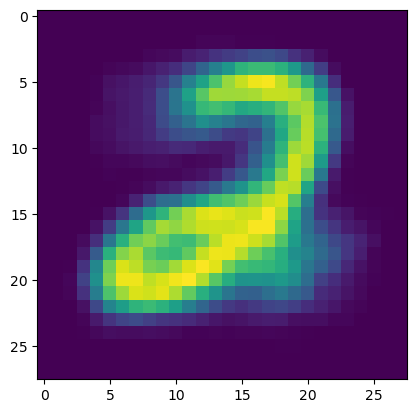

In [62]:
plt.imshow(x_1.reshape(28,28))
plt.show()

In [63]:
w1.shape

(784,)

In [95]:
# Checking the number of eigenvectors required to preserve 95% variance



def choose_k(threshold=0.95):
    var_preserved = 0
    sum_evals = np.sum(e_vals)
    counter = 0
    evals_reversed = np.flip(e_vals)
    
    while var_preserved < threshold:
        var_preserved = np.sum(evals_reversed[0:counter])/sum_evals
        counter +=1
    print(var_preserved)
    return counter
    

print(choose_k(0.95))
print("-------------")
print(choose_k(1))

0.951175125415069
44
-------------
1.0000000000000004
101


In [96]:
# For loop to take the top 53 eigenvectors
x_1 = 0
for i in range(44):
    x_1 += (X[0].T @ e_vectors[:,-i].reshape(-1,1))*e_vectors[:,-i].reshape(-1,1)

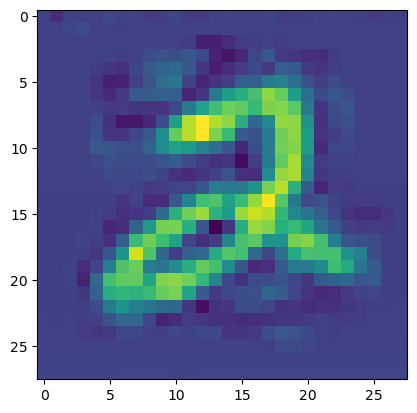

In [97]:
plt.imshow(x_1.reshape(-1,28))
plt.show()

In [85]:
e_vectors.shape

(784, 784)

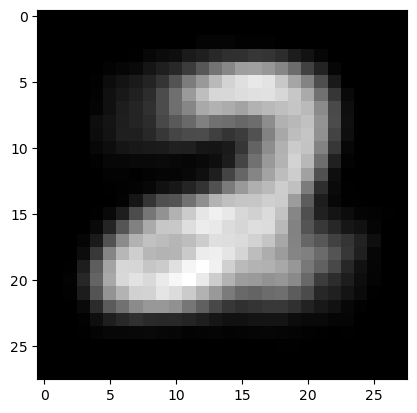

In [89]:
w1_image = w1.reshape(28, 28)
plt.imshow(w1_image, cmap = 'gray')

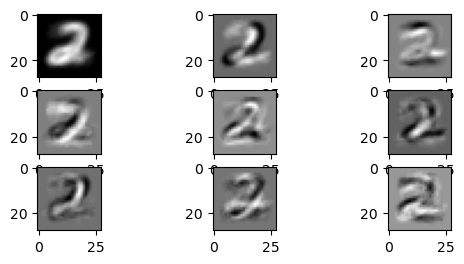

In [86]:
# visualizing the top 9 eigenvectors to see the structural information they store in them
for i in range(1,10):
    plt.subplot(5, 3, i)
    plt.imshow(e_vectors[:,-i].reshape(-1,28), cmap="gray")

# PCA using SVD

We have also studied how singular value decomposition works.

If we have a matrix $A$ which is $n\times m$

Then,
$$
A = U\Sigma V^T
$$

Here, U is $n \times n$

$\Sigma$ is $n \times m$

V is $m \times m$

In [101]:
#SVD of the matrix X_new

u, s, v_T = np.linalg.svd(X_new)

In [104]:
# Getting V out of V-transpose
v = v_T.T

In [105]:
# Our V matrix consists of the PCs

v.shape

(784, 784)

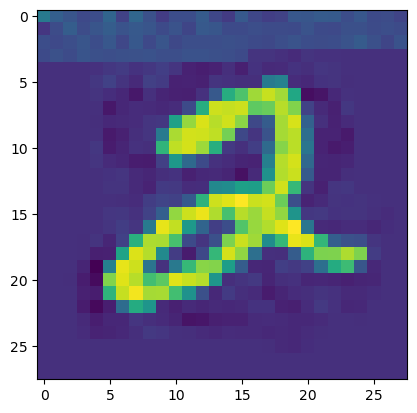

In [113]:
plt.imshow(v[0].reshape(-1,28))


In [114]:
x_1_svd = 0
for i in range(44):
    x_1_svd += (X[0].T @ v[i].reshape(-1,1))*v[i].reshape(-1,1)

In [116]:
x_1_svd.shape

(784, 1)

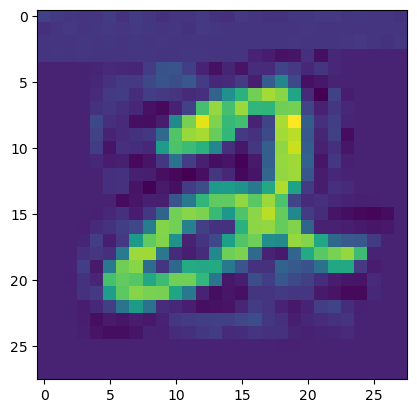

In [118]:
plt.imshow(x_1_svd.reshape(-1,28))